# Lead Score Assignment

In [184]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
# Import RFE
from sklearn.feature_selection import RFE

## Read and Understand the Data

In [185]:
# read the dataset
lead_df = pd.read_csv(r"C:\Users\pursw\Downloads\Lead Scoring Assignment\Leads.csv", sep=",", encoding="ISO-8859-1", header=0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [186]:
# basics of the df
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [187]:
# shape of df
lead_df.shape

(9240, 37)

### Checks for Duplicates

In [188]:
#check for duplicates in Prospect ID column
sum(lead_df.duplicated(subset = 'Prospect ID')) == 0

True

In [189]:
#check for duplicates in Lead Number column
sum(lead_df.duplicated(subset = 'Lead Number')) == 0

True

##### Clearly Prospect ID & Lead Number are two unique variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [190]:
# Dropping the columns Prospect ID
lead_df.drop(['Prospect ID'], 1, inplace = True)

## Data Cleaning

### 'Select' values in some columns :
##### There are some columns in dataset which have a value called 'Select'. This reason for this could be that these fields in the website might be non mandatory fields with drop downs options for the customer to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customer might have have chosen to leave it as the default value 'Select'.

In [191]:
# Converting all the values to lower case
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [192]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_df = lead_df.replace('select',np.nan)

In [193]:
# missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [194]:
# Dropping the columns where null values >= 40%
lead_df = lead_df.drop('Lead Quality',axis=1)
lead_df = lead_df.drop('Asymmetrique Activity Index',axis=1)
lead_df = lead_df.drop('Asymmetrique Profile Index',axis=1)
lead_df = lead_df.drop('Asymmetrique Activity Score',axis=1)
lead_df = lead_df.drop('Asymmetrique Profile Score',axis=1)
lead_df = lead_df.drop('Last Activity',axis=1)
lead_df = lead_df.drop('Last Notable Activity',axis=1)
lead_df = lead_df.drop('How did you hear about X Education',axis=1)
lead_df = lead_df.drop('Lead Profile',axis=1)

In [195]:
# Dropping the Sales Team generated columns not system generated columns, 
# as these columns shall not available in model building  
lead_df = lead_df.drop('Tags',axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,api,olark chat,no,no,0,0.0,0,0.0,NaN,...,no,no,no,no,no,no,no,NaN,no,no
1,660728,api,organic search,no,no,0,5.0,674,2.5,india,...,no,no,no,no,no,no,no,NaN,no,no
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,india,...,no,no,no,no,no,no,no,mumbai,no,yes
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,india,...,no,no,no,no,no,no,no,mumbai,no,no
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,india,...,no,no,no,no,no,no,no,mumbai,no,no


In [196]:
# missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [197]:
# Instead of deleting columns with null value percentage(between 15 to 40), which results in loss of data, 
# this strategy adds more information into the dataset and results in the change of variance.
lead_df['Specialization'] = lead_df['Specialization'].fillna('not provided') 
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('not provided')
lead_df['Country'] = lead_df['Country'].fillna('not provided')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('not provided')
lead_df['City'] = lead_df['City'].fillna('not provided')
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        9240 

#### Missing Values Treatment 

In [198]:
# missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [199]:
lead_df['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
press_release           2
live chat               2
testone                 1
youtubechannel          1
welearn                 1
welearnblog_home        1
blog                    1
pay per click ads       1
nc_edm                  1
Name: Lead Source, dtype: int64

In [200]:
#replacing Nan Values with mode i.e. google and combining low frequency values
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['facebook','live chat'],'social media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'welearn','blog','pay per click ads',
                                                    'testone','nc_edm'] ,'others')

lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'google')

In [201]:
lead_df.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [202]:
lead_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [203]:
#Drop all rows for 'Page Views Per Visit' & 'TotalVisits' which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead_df_new = lead_df.dropna()

In [204]:
# missing values
round(100*(lead_df_new.isnull().sum())/len(lead_df_new), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [205]:
lead_df_new["Country"].value_counts()

india                   6492
not provided            2324
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
canada                     4
nigeria                    4
kuwait                     4
south africa               4
germany                    4
sweden                     3
china                      2
asia/pacific region        2
belgium                    2
philippines                2
bangladesh                 2
ghana                      2
italy                      2
netherlands                2
uganda                     2
switzerland                1
liberia                    1
vietnam                    1
malaysia                   1
russia                     1
sri lanka     

In [206]:
# combining low frequency values in Country column
lead_df_new["Country"] = lead_df_new["Country"].apply(lambda x : 'india' if x=='india' else ('not provided' if x=='not provided' else 'other'))

In [207]:
lead_df_new["City"].value_counts()

not provided                   3600
mumbai                         3179
thane & outskirts               746
other cities                    680
other cities of maharashtra     447
other metro cities              377
tier ii cities                   74
Name: City, dtype: int64

In [208]:
# combining low frequency values in City column
lead_df_new["City"] = lead_df_new["City"].apply(lambda x : 'mumbai' if x=='mumbai' else ('not provided' if x=='not provided' else 'other'))

In [209]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_df_new.nunique()

Lead Number                                      9103
Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [210]:
# Dropping unique valued columns
lead_df_new= lead_df_new.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
              'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [211]:
# missing values
round(100*(lead_df_new.isnull().sum())/len(lead_df_new), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [212]:
# Code for checking number of rows retained in percent after null treatment
round(100*(lead_df_new.shape[0])/(lead_df.shape[0]),2)

98.52

In [213]:
lead_df_new.shape

(9103, 21)

## EDA

In [214]:
lead_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        9103 

### Categorical Variables

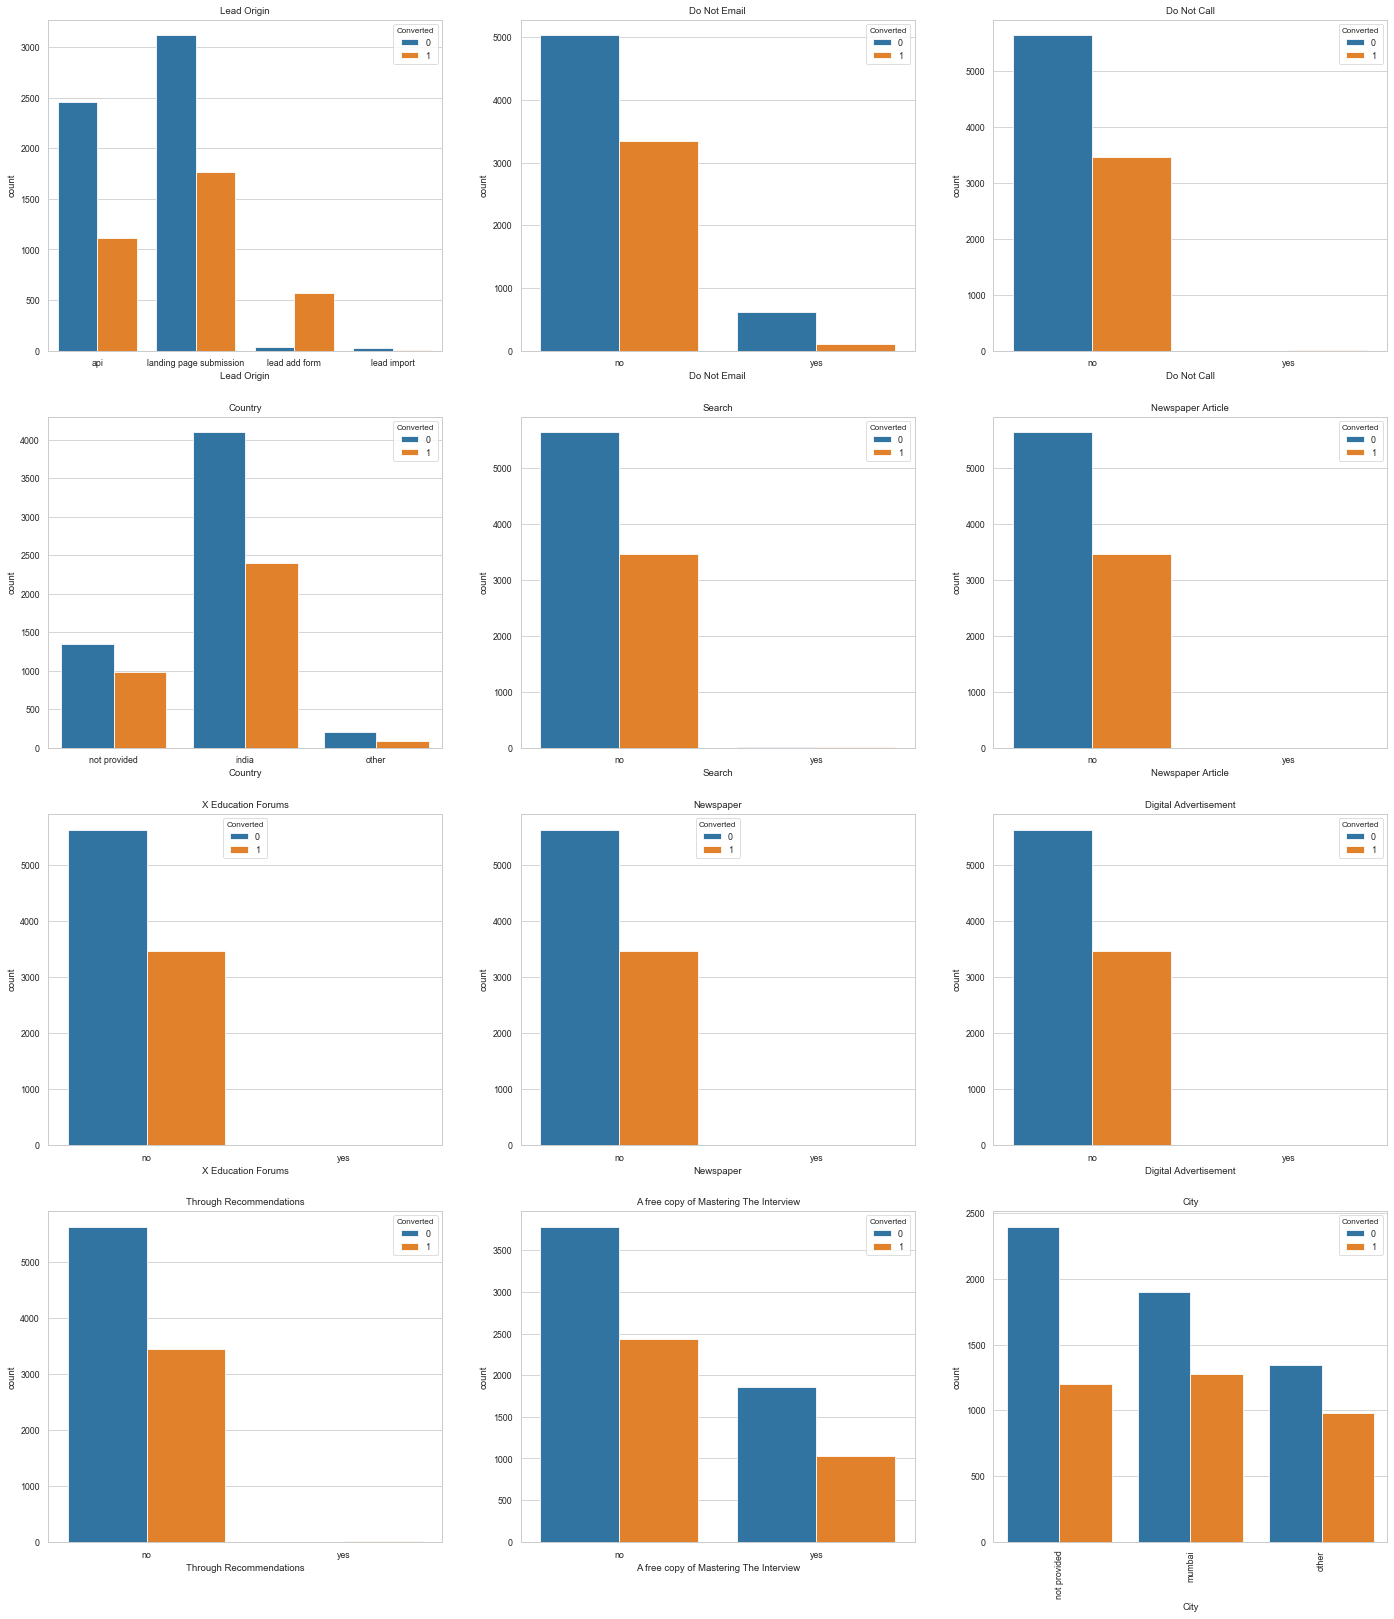

In [215]:
plt.figure(figsize = (24,28))

plt.subplot(4,3,1)
sns.countplot(lead_df_new['Lead Origin'], hue = lead_df_new.Converted)
plt.title('Lead Origin')

plt.subplot(4,3,2)
sns.countplot(lead_df_new['Do Not Email'], hue = lead_df_new.Converted)
plt.title('Do Not Email')

plt.subplot(4,3,3)
sns.countplot(lead_df_new['Do Not Call'], hue = lead_df_new.Converted)
plt.title('Do Not Call')

plt.subplot(4,3,4)
sns.countplot(lead_df_new['Country'], hue = lead_df_new.Converted)
plt.title('Country')

plt.subplot(4,3,5)
sns.countplot(lead_df_new['Search'], hue = lead_df_new.Converted)
plt.title('Search')

plt.subplot(4,3,6)
sns.countplot(lead_df_new['Newspaper Article'], hue = lead_df_new.Converted)
plt.title('Newspaper Article')

plt.subplot(4,3,7)
sns.countplot(lead_df_new['X Education Forums'], hue = lead_df_new.Converted)
plt.title('X Education Forums')

plt.subplot(4,3,8)
sns.countplot(lead_df_new['Newspaper'], hue = lead_df_new.Converted)
plt.title('Newspaper')

plt.subplot(4,3,9)
sns.countplot(lead_df_new['Digital Advertisement'], hue = lead_df_new.Converted)
plt.title('Digital Advertisement')

plt.subplot(4,3,10)
sns.countplot(lead_df_new['Through Recommendations'], hue = lead_df_new.Converted)
plt.title('Through Recommendations')

plt.subplot(4,3,11)
sns.countplot(lead_df_new['A free copy of Mastering The Interview'], hue = lead_df_new.Converted)
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,3,12)
sns.countplot(lead_df_new['City'], hue = lead_df_new.Converted).tick_params(axis='x', rotation = 90)
plt.title('City')


plt.show()

#### Inferences Lead Origin
API and Landing Page Submission bring higher number of leads as well as conversion.                                
Lead Add Form has a very high conversion rate but count of leads are not very high.                                 
Lead Import and Quick Add Form get very few leads.                                                   
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [216]:
# Clearly we can see there are some skewed columns 
# where the percentage of particular category in a column is much higher than the other
# Hence removing those columns
lead_df_new = lead_df_new.drop('Do Not Call',axis=1)
lead_df_new = lead_df_new.drop('Search',axis=1)
lead_df_new = lead_df_new.drop('Newspaper Article',axis=1)
lead_df_new = lead_df_new.drop('X Education Forums',axis=1)
lead_df_new = lead_df_new.drop('Newspaper',axis=1)
lead_df_new = lead_df_new.drop('Digital Advertisement',axis=1)
lead_df_new = lead_df_new.drop('Through Recommendations',axis=1)
lead_df_new = lead_df_new.drop('Country',axis=1)

In [217]:
lead_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Specialization                                 9103 non-null   object 
 9   What is your current occupation                9103 

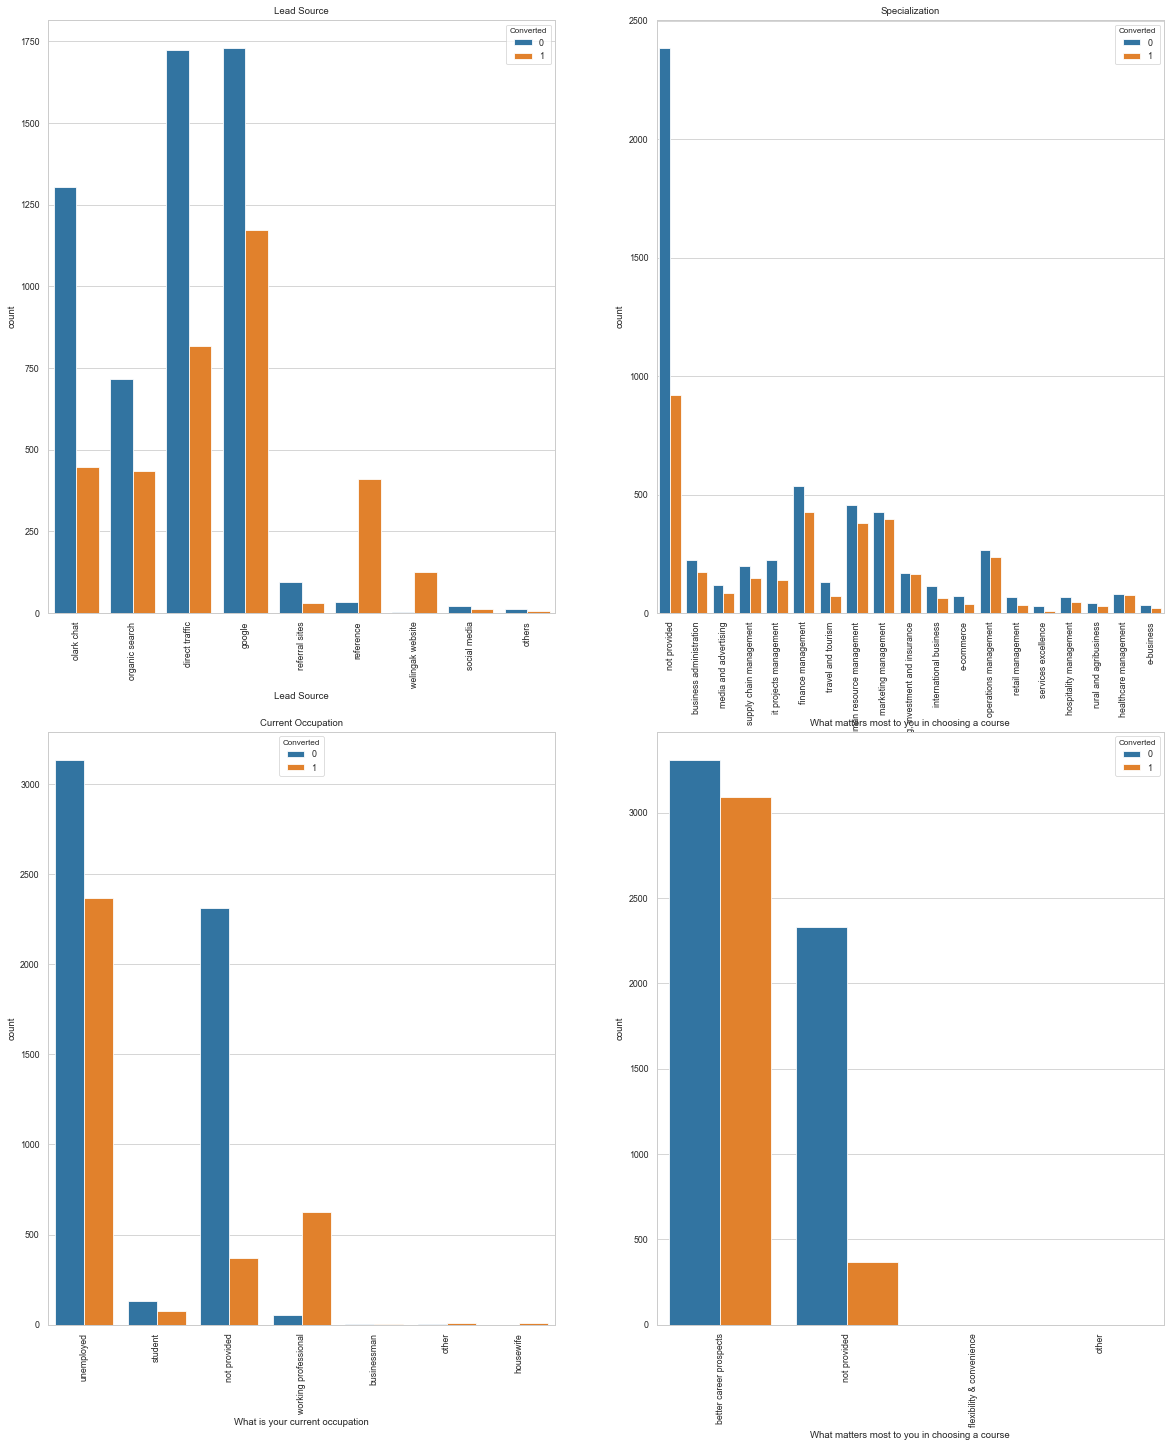

In [218]:
plt.figure(figsize = (20,24))
plt.subplot(2,2,1)
sns.countplot(lead_df_new['Lead Source'], hue = lead_df_new.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(2,2,2)
sns.countplot(lead_df_new['Specialization'], hue = lead_df_new.Converted).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,3)
sns.countplot(lead_df_new['What is your current occupation'], hue = lead_df_new.Converted).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,4)
sns.countplot(lead_df_new['What matters most to you in choosing a course'],hue = lead_df_new.Converted).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

#### Inference from Specialization
We see that specialization with **Management** in them have higher number of leads as well as leads converted. So this is definitely a significant variable

In [219]:
#combining Management Specializations because they show similar trends

lead_df_new['Specialization'] = lead_df_new['Specialization'].replace(['finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'management_specializations')

#### Inference from What is your current occupation                               
**Working Professionals** going for the course have high chances of joining it.
**Unemployed** leads are the most in terms of Absolute numbers.

#### Inference from **Lead Source**                                                                
Maximum number of leads are generated by **Google** and **Direct traffic**.
Conversion Rate of **reference** leads and leads through **welingak website** is high.
To improve overall lead conversion rate, focus should be on improving lead converion of **olark chat**, **organic search**, **direct traffic**, and **google leads** and generate more leads from **reference** and **welingak website**.

### Numerical Variables

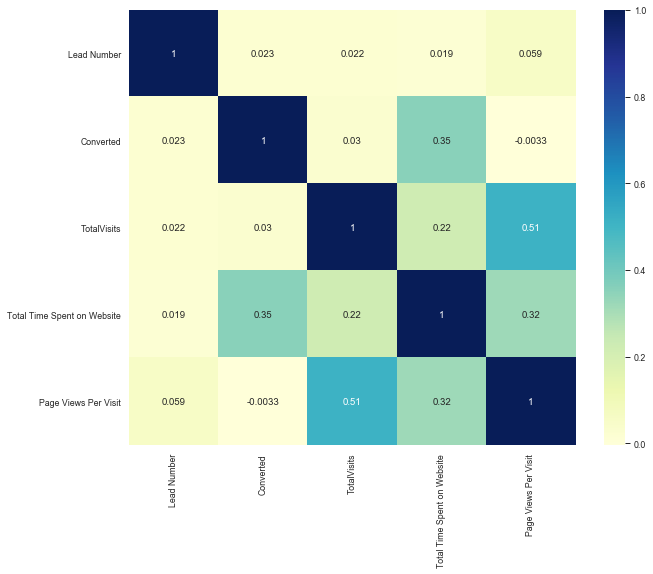

In [220]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))
sns.heatmap(lead_df_new.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Outlier Analysis

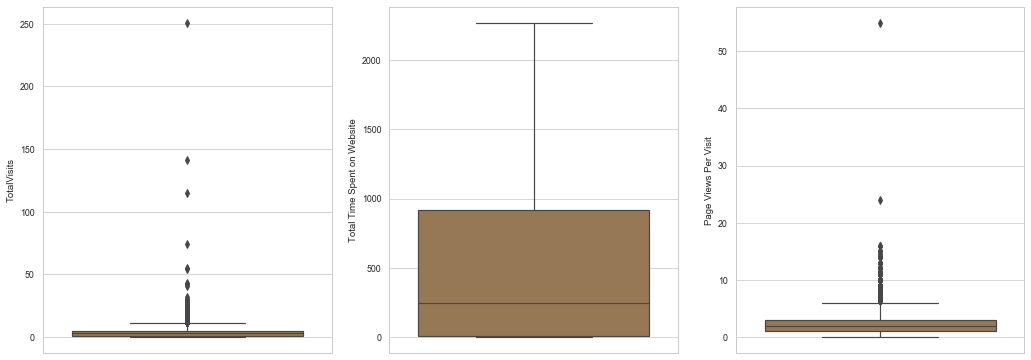

In [221]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(30,14))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=lead_df_new)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
  #  plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)


Outlier can be observed in some Numerical columns

#### Outlier Treatment

In [222]:
# Performing the upper capping on TotalVisits & Page Views Per Visit columns
q1 = lead_df_new['TotalVisits'].quantile(0.02)
q2 = lead_df_new['TotalVisits'].quantile(0.98)
lead_df_new['TotalVisits'][lead_df_new['TotalVisits']>=q2]= q2

q1 = lead_df_new['Page Views Per Visit'].quantile(0.02)
q2 = lead_df_new['Page Views Per Visit'].quantile(0.98)
lead_df_new['Page Views Per Visit'][lead_df_new['Page Views Per Visit']>=q2]= q2

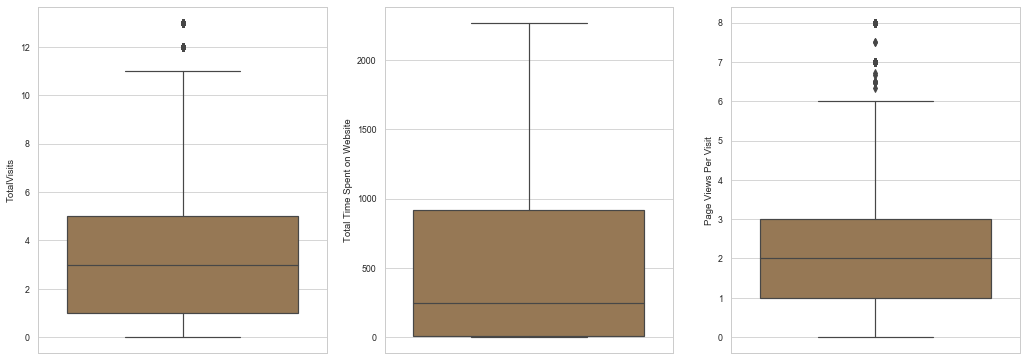

In [223]:
#Function to plot the distribution plot of the numeric variable list again
def boxplot(var_list):
    plt.figure(figsize=(30,14))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=lead_df_new)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
  #  plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [224]:
# Code for checking agin number of rows retained in percent after null treatment
round(100*(lead_df_new.shape[0])/(lead_df.shape[0]),2)

98.52

In [225]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'yes': "1" ,"no": "0"})

# Applying the function to the housing list
lead_df_new[varlist] = lead_df_new[varlist].apply(binary_map)

In [226]:
lead_df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,660737,api,olark chat,0,0,0.0,0,0.0,not provided,unemployed,better career prospects,not provided,0
1,660728,api,organic search,0,0,5.0,674,2.5,not provided,unemployed,better career prospects,not provided,0
2,660727,landing page submission,direct traffic,0,1,2.0,1532,2.0,business administration,student,better career prospects,mumbai,1
3,660719,landing page submission,direct traffic,0,0,1.0,305,1.0,media and advertising,unemployed,better career prospects,mumbai,0
4,660681,landing page submission,google,0,1,2.0,1428,1.0,not provided,unemployed,better career prospects,mumbai,0


In [227]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_df_new[['Lead Origin','Lead Source', 'Do Not Email','Specialization', 
                                    'What is your current occupation',
                                  'What matters most to you in choosing a course', 
                                    'City','A free copy of Mastering The Interview']], drop_first=False)

In [228]:
# Add the results to the master dataframe
lead_df_new_dum = pd.concat([lead_df_new, dummy], axis=1)
lead_df_new_dum.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not provided,What matters most to you in choosing a course_other,City_mumbai,City_not provided,City_other,A free copy of Mastering The Interview_0,A free copy of Mastering The Interview_1
0,660737,api,olark chat,0,0,0.0,0,0.0,not provided,unemployed,...,0,1,0,0,0,0,1,0,1,0
1,660728,api,organic search,0,0,5.0,674,2.5,not provided,unemployed,...,0,1,0,0,0,0,1,0,1,0
2,660727,landing page submission,direct traffic,0,1,2.0,1532,2.0,business administration,student,...,0,1,0,0,0,1,0,0,0,1
3,660719,landing page submission,direct traffic,0,0,1.0,305,1.0,media and advertising,unemployed,...,0,1,0,0,0,1,0,0,1,0
4,660681,landing page submission,google,0,1,2.0,1428,1.0,not provided,unemployed,...,0,1,0,0,0,1,0,0,1,0


In [229]:
lead_df_new_dum.shape

(9103, 55)

In [230]:
lead_df_new_dum = lead_df_new_dum.drop(['Lead Origin','Lead Origin_lead import', 'Lead Source','Lead Source_others', 'Do Not Email','Do Not Email_0', 'Specialization', 
                                        'Specialization_not provided','What is your current occupation',
                                        'What is your current occupation_not provided','What matters most to you in choosing a course', 
                                  'What matters most to you in choosing a course_not provided','City','City_not provided',
                                        'A free copy of Mastering The Interview','A free copy of Mastering The Interview_0'], axis=1)
lead_df_new_dum.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other,A free copy of Mastering The Interview_1
0,660737,0,0.0,0,0.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,660719,0,1.0,305,1.0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [231]:
original_leads = lead_df_new_dum.copy()
# Dropping Lead Number column as it is not useful for analysis
lead_df_new_dum = lead_df_new_dum.drop('Lead Number',axis=1)

In [232]:
lead_df_new_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9103 non-null   int64  
 1   TotalVisits                                                              9103 non-null   float64
 2   Total Time Spent on Website                                              9103 non-null   int64  
 3   Page Views Per Visit                                                     9103 non-null   float64
 4   Lead Origin_api                                                          9103 non-null   uint8  
 5   Lead Origin_landing page submission                                      9103 non-null   uint8  
 6   Lead Origin_lead add form                                               

In [233]:
# cat_cols= lead_df_new.select_dtypes(include=['object']).columns
# cat_cols

## Train and Test split

In [234]:
# Putting feature variable to X
X = lead_df_new_dum.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other,A free copy of Mastering The Interview_1
0,0.0,0,0.0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1.0,305,1.0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [235]:
# Putting response variable to y
y = lead_df_new_dum['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [236]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [237]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other,A free copy of Mastering The Interview_1
7962,-0.093595,1.476324,-0.422237,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
5520,1.213557,-0.771066,2.411143,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1962,0.559981,-0.571257,0.092923,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1566,3.174284,1.393834,0.608083,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
9170,-1.073959,-0.881052,-1.194977,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [238]:
### Checking the Conversion Rate
Converted = (sum(lead_df_new['Converted'])/len(lead_df_new['Converted'].index))*100
Converted

38.02043282434362

## Model Building

### Running our first model

In [239]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.5
Date:                Mon, 07 Dec 2020   Deviance:                       5622.9
Time:                        19:10:13   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.9519      1.547     -1.908      0.056      -5.985       0.081
TotalVisits                                                                 0.2493      0.048      5.185      0.000       0.155       0.344
Total Time Spent on Website                                                 1.0762      0.039     27.610      0.000       1.000       1.153
Page Views Per Visit                                                       -0.1370      0.055     -2.499      0.012      -0.244      -0.030
Lead Origin_api                                                            -0.1093      1.202     -0.091      0.928      -2.466       2.247
Lead Origin_landing page submission                                        -0.7337      1.200     -0.611      0.541      -3.086       1.618
Lead Origin_lead add form                                                   4.3826      1.382      3.170      0.002       1.673       7.092
Lead Source_direct traffic                                                  0.8048      0.984      0.818      0.413      -1.124       2.733
Lead Source_google                                                          0.9395      0.981      0.958      0.338      -0.983       2.862
Lead Source_olark chat                                                      1.9044      0.987      1.929      0.054      -0.030       3.839
Lead Source_organic search                                                  0.8980      0.986      0.910      0.363      -1.035       2.831
Lead Source_reference                                                      -0.0414      1.198     -0.035      0.972      -2.389       2.306
Lead Source_referral sites                                                  0.4326      1.035      0.418      0.676      -1.597       2.462
Lead Source_social media                                                    1.3951      1.494      0.934      0.350      -1.532       4.322
Lead Source_welingak website                                                2.3921      1.378      1.736      0.083      -0.309       5.093
Do Not Email_1                                                             -1.2714      0.162     -7.861      0.000      -1.588      -0.954
Specialization_banking, investment and insurance                            0.8435      0.220      3.826      0.000       0.411       1.276
Specialization_business administration                                      0.5850      0.218      2.685      0.007       0.158       1.012
Specialization_e-business                                                   1.1192      0.414      2.703      0.007       0.308       1.931
Spe

### Feature Selection using RFE

In [240]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [241]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [242]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_api', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Source_direct traffic', False, 14),
 ('Lead Source_google', False, 18),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 17),
 ('Lead Source_reference', False, 12),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 15),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_1', True, 1),
 ('Specialization_banking, investment and insurance', True, 1),
 ('Specialization_business administration', False, 2),
 ('Specialization_e-business', True, 1),
 ('Specialization_e-commerce', False, 8),
 ('Specialization_international business', False, 6),
 ('Specialization_management_specializations', False, 4),
 ('Specialization_media and advertising', False, 5),
 ('Specialization_rural and agribusiness'

In [243]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [244]:
# # Selecting columns selected by RFE
# X_train = X_train[col]

In [245]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_reference', 'Lead Source_social media',
       'Specialization_business administration', 'Specialization_e-commerce',
       'Specialization_international business',
       'Specialization_management_specializations',
       'Specialization_media and advertising',
       'Specialization_rural and agribusiness',
       'Specialization_travel and tourism',
       'What is your current occupation_businessman',
       'What matters most to you in choosing a course_other',
       'A free copy of Mastering The Interview_1'],
      dtype='object')

##### Assessing the model with StatsModels

In [246]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.9
Date:                Mon, 07 Dec 2020   Deviance:                       5677.8
Time:                        19:10:15   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.7219      0.461     -3.734      0.000      -2.626      -0.818
Total Time Spent on Website                                                 1.0943      0.039     28.239      0.000       1.018       1.170
Lead Origin_api                                                            -0.3647      0.458     -0.797      0.426      -1.262       0.532
Lead Origin_landing page submission                                        -1.0126      0.444     -2.283      0.022      -1.882      -0.143
Lead Origin_lead add form                                                   3.2359      0.495      6.542      0.000       2.266       4.205
Lead Source_olark chat                                                      0.8853      0.115      7.682      0.000       0.659       1.111
Lead Source_referral sites                                                 -0.4426      0.331     -1.337      0.181      -1.091       0.206
Lead Source_welingak website                                                2.2005      0.750      2.933      0.003       0.730       3.671
Do Not Email_1                                                             -1.2833      0.159     -8.093      0.000      -1.594      -0.972
Specialization_banking, investment and insurance                            0.3433      0.169      2.026      0.043       0.011       0.675
Specialization_e-business                                                   0.5520      0.388      1.422      0.155      -0.209       1.313
Specialization_services excellence                                          0.6659      0.554      1.201      0.230      -0.421       1.753
What is your current occupation_housewife                                  21.2173   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_other                                      -1.4091      1.070     -1.316      0.188      -3.507       0.689
What is your current occupation_student                                    -1.4435      0.882     -1.636      0.102      -3.172       0.285
What is your current occupation_unemployed                                 -1.3537      0.862     -1.570      0.116      -3.044       0.336
What is your current occupation_working professional                        1.2155      0.869      1.399      0.162      -0.487       2.918
What matters most to you in choosing a course_better career prospects       2.6223      0.862      3.043      0.002       0.933       4.311
What matters most to you in choosing a course_flexibility & convenience    25.3725   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Cit

In [247]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.703176
5520    0.090325
1962    0.201285
1566    0.965824
9170    0.289708
5097    0.102901
8954    0.280706
309     0.233310
5519    0.102901
1050    0.601613
dtype: float64

In [248]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70317567, 0.09032528, 0.20128539, 0.96582373, 0.28970843,
       0.10290054, 0.2807058 , 0.23331041, 0.10290054, 0.60161337])

##### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [249]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.703176,7962
1,0,0.090325,5520
2,0,0.201285,1962
3,1,0.965824,1566
4,0,0.289708,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [250]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.703176,7962,1
1,0,0.090325,5520,0
2,0,0.201285,1962,0
3,1,0.965824,1566,1
4,0,0.289708,9170,0


In [251]:
from sklearn import metrics

#### Creating Confusion Metrics

In [252]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3536  417]
 [ 848 1571]]


In [253]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8014752040175769


### Checking VIF's

In [254]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What matters most to you in choosing a course_...,258.70
14,What is your current occupation_unemployed,225.03
15,What is your current occupation_working profes...,27.73
2,Lead Origin_landing page submission,8.66
13,What is your current occupation_student,7.78
18,City_mumbai,5.21
19,City_other,3.92
1,Lead Origin_api,3.13
4,Lead Source_olark chat,2.27
3,Lead Origin_lead add form,1.90


In [256]:
# Dropping columns with high VIF and high p-value
col = col.drop('What matters most to you in choosing a course_better career prospects', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_api',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Do Not Email_1',
       'Specialization_banking, investment and insurance',
       'Specialization_e-business', 'Specialization_services excellence',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_flexibility & convenience',
       'City_mumbai', 'City_other'],
      dtype='object')

In [257]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.4
Date:                Mon, 07 Dec 2020   Deviance:                       5690.8
Time:                        19:10:15   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.7169      0.460     -3.728      0.000      -2.619      -0.814
Total Time Spent on Website                                                 1.0949      0.039     28.288      0.000       1.019       1.171
Lead Origin_api                                                            -0.3521      0.457     -0.770      0.441      -1.248       0.544
Lead Origin_landing page submission                                        -1.0182      0.443     -2.299      0.021      -1.886      -0.150
Lead Origin_lead add form                                                   3.2641      0.494      6.603      0.000       2.295       4.233
Lead Source_olark chat                                                      0.8825      0.115      7.664      0.000       0.657       1.108
Lead Source_referral sites                                                 -0.4529      0.330     -1.372      0.170      -1.100       0.194
Lead Source_welingak website                                                2.1917      0.751      2.920      0.004       0.720       3.663
Do Not Email_1                                                             -1.3224      0.158     -8.347      0.000      -1.633      -1.012
Specialization_banking, investment and insurance                            0.3482      0.169      2.056      0.040       0.016       0.680
Specialization_e-business                                                   0.5557      0.388      1.431      0.152      -0.205       1.317
Specialization_services excellence                                          0.6768      0.556      1.218      0.223      -0.412       1.766
What is your current occupation_housewife                                  23.8298   1.57e+04      0.002      0.999   -3.07e+04    3.07e+04
What is your current occupation_other                                       1.2044      0.640      1.883      0.060      -0.049       2.458
What is your current occupation_student                                     1.1098      0.228      4.878      0.000       0.664       1.556
What is your current occupation_unemployed                                  1.2571      0.084     14.974      0.000       1.093       1.422
What is your current occupation_working professional                        3.7664      0.190     19.854      0.000       3.395       4.138
What matters most to you in choosing a course_flexibility & convenience    22.7420   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
City_mumbai                                                                 0.7182      0.132      5.451      0.000       0.460       0.976
Cit

In [258]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.701970
5520    0.089301
1962    0.200168
1566    0.963585
9170    0.290268
5097    0.104217
8954    0.279349
309     0.232085
5519    0.104217
1050    0.602040
dtype: float64

In [259]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70197038, 0.08930074, 0.20016781, 0.96358463, 0.29026823,
       0.10421713, 0.27934853, 0.23208465, 0.10421713, 0.60203987])

In [260]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.701970,7962
1,0,0.089301,5520
2,0,0.200168,1962
3,1,0.963585,1566
4,0,0.290268,9170


In [261]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.701970,7962,1
1,0,0.089301,5520,0
2,0,0.200168,1962,0
3,1,0.963585,1566,1
4,0,0.290268,9170,0


In [262]:
from sklearn import metrics

In [263]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3533  420]
 [ 852 1567]]


In [264]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.800376647834275


In [265]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,8.66
17,City_mumbai,5.21
18,City_other,3.92
14,What is your current occupation_unemployed,3.31
1,Lead Origin_api,3.12
4,Lead Source_olark chat,2.27
3,Lead Origin_lead add form,1.89
15,What is your current occupation_working profes...,1.38
6,Lead Source_welingak website,1.33
0,Total Time Spent on Website,1.30


In [266]:
# Dropping columns with high VIF and high p-value
col = col.drop('Lead Origin_landing page submission', 1)
col = col.drop('What is your current occupation_housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_api',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_1', 'Specialization_banking, investment and insurance',
       'Specialization_e-business', 'Specialization_services excellence',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_flexibility & convenience',
       'City_mumbai', 'City_other'],
      dtype='object')

In [267]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.9
Date:                Mon, 07 Dec 2020   Deviance:                       5713.9
Time:                        19:10:16   Pearson chi2:                 6.54e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.7064      0.145    -18.720      0.000      -2.990      -2.423
Total Time Spent on Website                                                 1.0863      0.038     28.293      0.000       1.011       1.162
Lead Origin_api                                                             0.6591      0.130      5.059      0.000       0.404       0.915
Lead Origin_lead add form                                                   4.2771      0.239     17.905      0.000       3.809       4.745
Lead Source_olark chat                                                      0.8683      0.115      7.562      0.000       0.643       1.093
Lead Source_referral sites                                                 -0.4591      0.330     -1.393      0.164      -1.105       0.187
Lead Source_welingak website                                                2.1859      0.751      2.912      0.004       0.714       3.657
Do Not Email_1                                                             -1.3324      0.158     -8.423      0.000      -1.642      -1.022
Specialization_banking, investment and insurance                            0.3322      0.169      1.966      0.049       0.001       0.663
Specialization_e-business                                                   0.5354      0.388      1.381      0.167      -0.224       1.295
Specialization_services excellence                                          0.6606      0.554      1.192      0.233      -0.426       1.747
What is your current occupation_other                                       1.1790      0.639      1.846      0.065      -0.073       2.431
What is your current occupation_student                                     1.0833      0.227      4.770      0.000       0.638       1.528
What is your current occupation_unemployed                                  1.2344      0.083     14.836      0.000       1.071       1.398
What is your current occupation_working professional                        3.7442      0.189     19.773      0.000       3.373       4.115
What matters most to you in choosing a course_flexibility & convenience    20.7398   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
City_mumbai                                                                 0.7278      0.131      5.539      0.000       0.470       0.985
City_other                                                                  0.6845      0.133      5.135      0.000       0.423       0.946
===========================================================================================================================================
"""

In [268]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.702570
5520    0.090339
1962    0.203486
1566    0.963727
9170    0.288730
5097    0.105647
8954    0.282811
309     0.235507
5519    0.105647
1050    0.604438
dtype: float64

In [269]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70256993, 0.0903393 , 0.20348564, 0.96372696, 0.28872986,
       0.10564735, 0.28281126, 0.23550684, 0.10564735, 0.60443805])

In [270]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.702570,7962
1,0,0.090339,5520
2,0,0.203486,1962
3,1,0.963727,1566
4,0,0.288730,9170


In [271]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.702570,7962,1
1,0,0.090339,5520,0
2,0,0.203486,1962,0
3,1,0.963727,1566,1
4,0,0.288730,9170,0


In [272]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3529  424]
 [ 854 1565]]


In [273]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7994350282485876


In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_unemployed,3.00
1,Lead Origin_api,2.67
3,Lead Source_olark chat,2.24
15,City_mumbai,1.89
16,City_other,1.63
2,Lead Origin_lead add form,1.62
13,What is your current occupation_working profes...,1.33
5,Lead Source_welingak website,1.32
0,Total Time Spent on Website,1.30
6,Do Not Email_1,1.09


In [275]:
# Dropping columns with high VIF and high p-value
col = col.drop('What matters most to you in choosing a course_flexibility & convenience', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_api',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_1', 'Specialization_banking, investment and insurance',
       'Specialization_e-business', 'Specialization_services excellence',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional', 'City_mumbai',
       'City_other'],
      dtype='object')

In [276]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.7
Date:                Mon, 07 Dec 2020   Deviance:                       5715.5
Time:                        19:10:16   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7141      0.144    -18.789      0.000      -2.997      -2.431
Total Time Spent on Website                              1.0862      0.038     28.289      0.000       1.011       1.161
Lead Origin_api                                          0.6649      0.130      5.105      0.000       0.410       0.920
Lead Origin_lead add form                                4.2819      0.239     17.921      0.000       3.814       4.750
Lead Source_olark chat                                   0.8718      0.115      7.596      0.000       0.647       1.097
Lead Source_referral sites                              -0.4585      0.330     -1.391      0.164      -1.104       0.187
Lead Source_welingak website                             2.1875      0.751      2.914      0.004       0.716       3.659
Do Not Email_1                                          -1.3325      0.158     -8.424      0.000      -1.643      -1.022
Specialization_banking, investment and insurance         0.3314      0.169      1.962      0.050       0.000       0.663
Specialization_e-business                                0.5351      0.388      1.380      0.168      -0.225       1.295
Specialization_services excellence                       0.6596      0.554      1.190      0.234      -0.427       1.746
What is your current occupation_other                    1.1785      0.639      1.845      0.065      -0.073       2.430
What is your current occupation_student                  1.0831      0.227      4.769      0.000       0.638       1.528
What is your current occupation_unemployed               1.2353      0.083     14.847      0.000       1.072       1.398
What is your current occupation_working professional     3.7445      0.189     19.775      0.000       3.373       4.116
City_mumbai                                              0.7359      0.131      5.608      0.000       0.479       0.993
City_other                                               0.6908      0.133      5.185      0.000       0.430       0.952
========================================================================================================================
"""

In [277]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.702789
5520    0.089780
1962    0.203686
1566    0.963744
9170    0.289233
5097    0.105796
8954    0.283055
309     0.235727
5519    0.105796
1050    0.604261
dtype: float64

In [278]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70278941, 0.08978045, 0.2036862 , 0.96374438, 0.28923263,
       0.10579577, 0.28305484, 0.2357268 , 0.10579577, 0.60426127])

In [279]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.702789,7962
1,0,0.089780,5520
2,0,0.203686,1962
3,1,0.963744,1566
4,0,0.289233,9170


In [280]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.702789,7962,1
1,0,0.089780,5520,0
2,0,0.203686,1962,0
3,1,0.963744,1566,1
4,0,0.289233,9170,0


In [281]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3529  424]
 [ 854 1565]]


In [282]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7994350282485876


In [283]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_unemployed,3.00
1,Lead Origin_api,2.67
3,Lead Source_olark chat,2.24
14,City_mumbai,1.89
15,City_other,1.63
2,Lead Origin_lead add form,1.62
13,What is your current occupation_working profes...,1.33
5,Lead Source_welingak website,1.32
0,Total Time Spent on Website,1.30
6,Do Not Email_1,1.09


In [284]:
# Dropping columns with high VIF and high p-value
col = col.drop('Specialization_services excellence', 1)
col = col.drop('Specialization_e-business', 1)
col = col.drop('Lead Source_referral sites', 1)
col = col.drop('What is your current occupation_unemployed', 1)
col = col.drop('What is your current occupation_other', 1)
col = col.drop('What is your current occupation_student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_api',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_1',
       'Specialization_banking, investment and insurance',
       'What is your current occupation_working professional', 'City_mumbai',
       'City_other'],
      dtype='object')

In [285]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.9
Date:                Mon, 07 Dec 2020   Deviance:                       5967.8
Time:                        19:10:16   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9583      0.130    -15.102      0.000      -2.212      -1.704
Total Time Spent on Website                              1.0871      0.037     29.063      0.000       1.014       1.160
Lead Origin_api                                          0.7524      0.128      5.894      0.000       0.502       1.003
Lead Origin_lead add form                                4.6726      0.240     19.456      0.000       4.202       5.143
Lead Source_olark chat                                   0.7307      0.111      6.607      0.000       0.514       0.947
Lead Source_welingak website                             2.2634      0.751      3.014      0.003       0.792       3.735
Do Not Email_1                                          -1.3290      0.155     -8.569      0.000      -1.633      -1.025
Specialization_banking, investment and insurance         0.3276      0.166      1.974      0.048       0.002       0.653
What is your current occupation_working professional     2.8251      0.177     15.926      0.000       2.477       3.173
City_mumbai                                              0.9460      0.129      7.338      0.000       0.693       1.199
City_other                                               0.8929      0.131      6.824      0.000       0.636       1.149
========================================================================================================================
"""

In [286]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.643958
5520    0.057512
1962    0.163375
1566    0.965379
9170    0.192630
5097    0.192630
8954    0.231670
309     0.190617
5519    0.192630
1050    0.536667
dtype: float64

In [287]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64395773, 0.05751176, 0.16337542, 0.96537859, 0.19263017,
       0.19263017, 0.23167026, 0.19061706, 0.19263017, 0.53666744])

In [288]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.643958,7962
1,0,0.057512,5520
2,0,0.163375,1962
3,1,0.965379,1566
4,0,0.192630,9170


In [289]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.643958,7962,1
1,0,0.057512,5520,0
2,0,0.163375,1962,0
3,1,0.965379,1566,1
4,0,0.192630,9170,0


In [290]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3471  482]
 [ 886 1533]]


In [291]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7853107344632768


In [292]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_olark chat,2.19
1,Lead Origin_api,2.01
2,Lead Origin_lead add form,1.47
4,Lead Source_welingak website,1.32
0,Total Time Spent on Website,1.29
7,What is your current occupation_working profes...,1.15
8,City_mumbai,1.14
9,City_other,1.11
5,Do Not Email_1,1.08
6,"Specialization_banking, investment and insurance",1.06


### Calculating Metrics beyond Accuracy

In [293]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [294]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6337329474989665

In [295]:
# Let us calculate specificity
TN / float(TN+FP)

0.8780672906653175

In [296]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12193270933468252


In [297]:
# positive predictive value 
print (TP / float(TP+FP))

0.7607940446650124


In [298]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7966490704613266


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [299]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [300]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

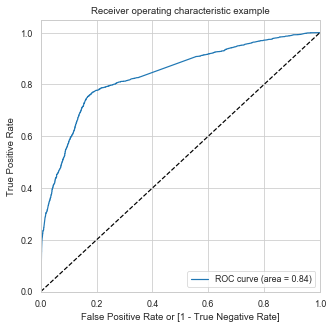

(array([0.        , 0.        , 0.        , ..., 0.99949406, 0.99974703,
        1.        ]),
 array([0.00000000e+00, 4.13393964e-04, 8.26787929e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99955705, 0.99955705, 0.99955198, ..., 0.01802213, 0.016373  ,
        0.01568172]))

In [301]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the area under the curve(GINI)

In [302]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [303]:
auc = auc_val(fpr,tpr)
auc

0.8368466417152294

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [304]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.643958,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.057512,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.163375,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.965379,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.192630,9170,0,1,1,0,0,0,0,0,0,0,0


In [305]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.434401  0.991732  0.093347
0.2   0.2  0.725204  0.823894  0.664812
0.3   0.3  0.796767  0.770980  0.812547
0.4   0.4  0.798336  0.707730  0.853782
0.5   0.5  0.785311  0.633733  0.878067
0.6   0.6  0.771030  0.539479  0.912725
0.7   0.7  0.753296  0.437371  0.946623
0.8   0.8  0.729127  0.327821  0.974703
0.9   0.9  0.701664  0.224473  0.993676


### Let's plot accuracy sensitivity and specificity for various probabilities.

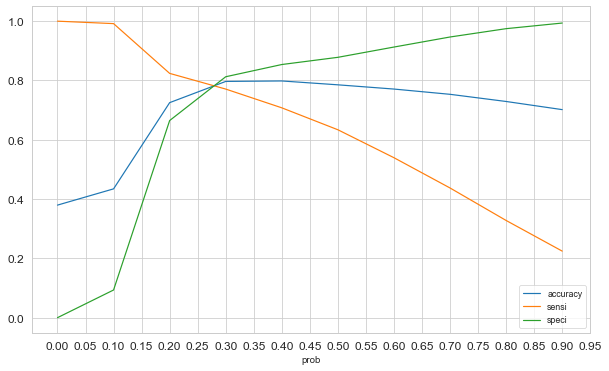

In [306]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above, around 0.29 is the optimum point to take it as a cutoff probability.

In [307]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.29 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.643958,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.057512,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.163375,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.965379,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.192630,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [308]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7940991839296924

In [309]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3186,  767],
       [ 545, 1874]], dtype=int64)

In [310]:

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [311]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7747002893757751

In [312]:
# Let us calculate specificity
TN / float(TN+FP)

0.8059701492537313

In [313]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19402985074626866


In [314]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8539265612436344


### Precision and Recall

#### Precision                                  
TP / TP + FP

In [315]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.7095797046573268

#### Recall                                  
TP / TP + FN

In [316]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.7747002893757751

#### Using sklearn utilities for the same

In [317]:
from sklearn.metrics import precision_score, recall_score

In [318]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7095797046573268

In [319]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7747002893757751

### Precision and recall tradeoff

In [320]:
from sklearn.metrics import precision_recall_curve

In [321]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    1
 6368    1
 6369    1
 6370    1
 6371    0
 Name: final_predicted, Length: 6372, dtype: int64)

In [322]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

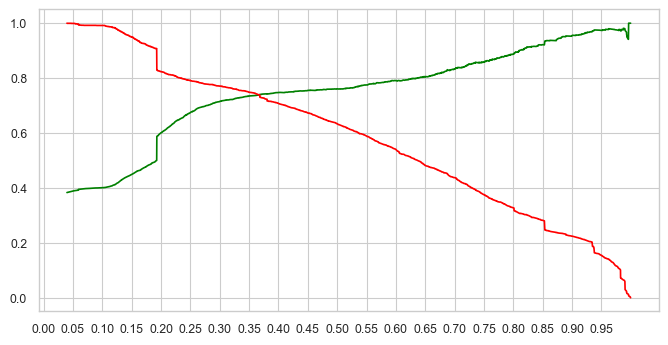

In [323]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to 0.37. However our business requirement here is to have Lead Conversion Rate around 80%.                                                             
This is already achieved with our earlier threshold value of 0.29. So we will stick to this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [324]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7407114624505928

## Making predictions on the test set

#### Using the scaler function from the train dataset to transfor the test dataset

In [325]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other,A free copy of Mastering The Interview_1
3504,-0.093595,-0.103815,0.350503,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4050,-1.073959,-0.881052,-1.194977,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7201,-0.420383,0.424120,-0.164657,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1196,0.233193,-0.105648,0.865663,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
8219,1.213557,-0.428274,-0.293447,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,1


In [326]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_api,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_1,"Specialization_banking, investment and insurance",What is your current occupation_working professional,City_mumbai,City_other
3504,-0.103815,0,0,0,0,0,0,0,1,0
4050,-0.881052,0,1,0,0,0,0,0,0,1
7201,0.424120,0,0,0,0,1,0,0,1,0
1196,-0.105648,0,0,0,0,0,0,0,0,1
8219,-0.428274,0,0,0,0,0,0,0,0,1


### Adding a constant

In [327]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [328]:
y_test_pred = res.predict(X_test_sm)

In [329]:
y_test_pred[:10]

3504    0.245053
4050    0.933972
7201    0.132363
1196    0.235009
8219    0.177852
8747    0.192630
9048    0.490684
6524    0.164194
7693    0.047149
8187    0.852765
dtype: float64

In [330]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [331]:
# Let's see the head
y_pred_1.head()

,0
3504,0.245053
4050,0.933972
7201,0.132363
1196,0.235009
8219,0.177852


In [332]:

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [333]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [334]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [335]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [336]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.245053
1,1,4050,0.933972
2,0,7201,0.132363
3,0,1196,0.235009
4,1,8219,0.177852


In [337]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [338]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [339]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3504,0,0.245053
1,4050,1,0.933972
2,7201,0,0.132363
3,1196,0,0.235009
4,8219,1,0.177852


In [340]:
y_pred_final.shape

(2731, 3)

#### Using the probability threshold value 0f 0.29 on the test dataset to predict if a lead will convert

In [341]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.29 else 0)

In [342]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3504,0,0.245053,0
1,4050,1,0.933972,1
2,7201,0,0.132363,0
3,1196,0,0.235009,0
4,8219,1,0.177852,0


In [343]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.7993409007689491

In [344]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1369  320]
 [ 228  814]]


## Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [345]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3504,0,0.245053,0
1,4050,1,0.933972,1
2,7201,0,0.132363,0
3,1196,0,0.235009,0
4,8219,1,0.177852,0


In [346]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.643958,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.057512,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.163375,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.965379,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.192630,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [347]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,7962,0,0.643958,1
1,5520,0,0.057512,0
2,1962,0,0.163375,0
3,1566,1,0.965379,1
4,9170,0,0.192630,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [348]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,7962,0,0.643958,1
1,5520,0,0.057512,0
2,1962,0,0.163375,0
3,1566,1,0.965379,1
4,9170,0,0.192630,0


In [349]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6372, 4)
(2731, 4)
(9103, 4)


In [350]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9103

In [351]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,7962,0,0.643958,1,64
1,5520,0,0.057512,0,6
2,1962,0,0.163375,0,16
3,1566,1,0.965379,1,97
4,9170,0,0.192630,0,19


In [352]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [353]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.192630,0,19
1,0,0.305633,1,31
2,1,0.747024,1,75
3,0,0.203865,0,20
4,1,0.705900,1,71


In [354]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Concatenating the 2 dataframes based on index.

This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [355]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.192630,0,19
1,660728,0,0.305633,1,31
2,660727,1,0.747024,1,75
3,660719,0,0.203865,0,20
4,660681,1,0.705900,1,71
5,660680,0,0.192630,0,19
6,660673,1,0.785501,1,79
7,660664,0,0.192630,0,19
8,660624,0,0.132195,0,13
9,660616,0,0.249336,0,25


In [356]:
# Inspecting the dataframe shape
leads_with_score.shape

(9103, 5)

In [357]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


### Confusion Matrix

In [358]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

### Showcasing the different metrics beyond accuracy on the test dataset

### Sensitivity
##### TP/TP+FP

In [359]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.781190019193858

### Specificity
##### TN/TN+FP

In [360]:
# Let us calculate specificity
TN / float(TN+FP)

0.8105387803433984

### False Positive Rate
##### FP/TN+FP

In [361]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18946121965660154


### Positive Predictive Value
##### TP/TP+FP

In [362]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7178130511463845


### Negative Predictive Value
##### TN/TN+FN

In [363]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8572323105823418


### Precision
##### TP/TP+FP

In [364]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7178130511463845

### Recall
##### TP/TP+FN

In [365]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.781190019193858

#### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [366]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7481617647058822

### Observation:
##### After running the model on the Test Data these are the figures we obtain:

Accuracy : 79%                                                         
Sensitivity : 78%                                                      
Specificity : 80%

### Final Observation:
#### Let us compare the values obtained for Train & Test:

**Train Data**:                                                                
Accuracy : 79%                                                              
Sensitivity : 78%                                                  
Specificity : 80%                                       
Precision : 71%                                                                        
Recall : 78%    
                                                                                            
**Test Data**:                                                              
Accuracy : 80%                                                                     
Sensitivity : 78%                                                                    
Specificity : 80%                                                               
Precision : 72%                                                                  
Recall :  78%

### Conclusion
#### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

- When the lead origin is Lead add format.

- When their current occupation is as a working professional.

- When the lead source was:                                                    
a. Welingak website                                                           
b. Olark Chat

- The total time spend on the Website.   

- When the city is Mumbai.

                                                                               
#### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.